Importing Dependices

In [34]:
import numpy as np
import pandas as pd
import sklearn.datasets
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [20]:
breast_cancer_dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [21]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [22]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [14]:
# features of the dataset
breast_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [27]:
data_frame.shape

(569, 31)

In [26]:
# some stastical meausre of the dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
#checking for the null values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

The above dataset dono't have any missing values. It is good thing

In [30]:
data_frame['label']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

In [31]:
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

Here 
1 -->  Benign
0 --> Malignant

In [33]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Let's analyse relation among featues among features.
Understanding the corelation between features.

1. Positve corelations
2. Negative corelations

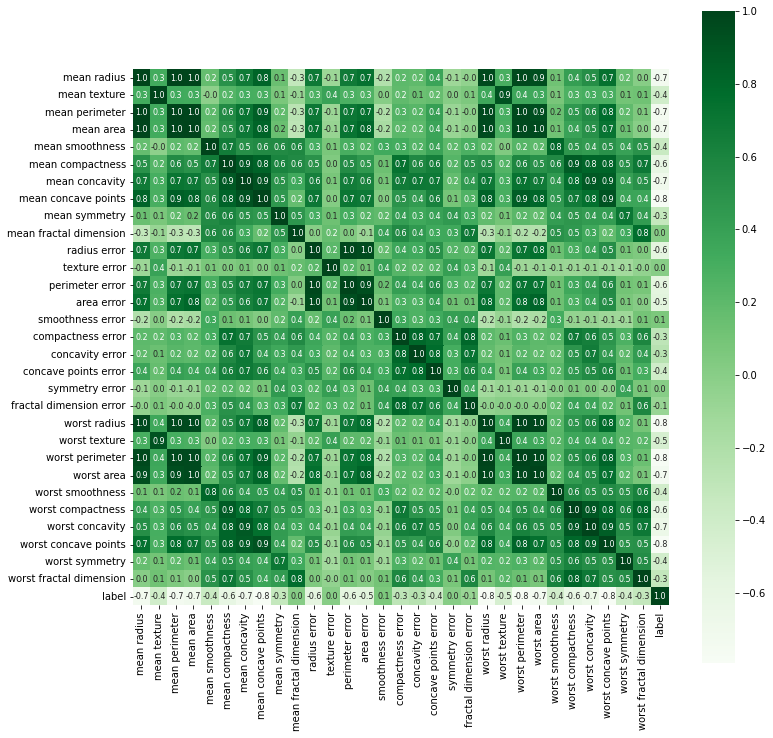

In [35]:
corelation = data_frame.corr()
# for the better understanding about the data, creating heatmap
plt.figure(figsize =(12,12))
sns.heatmap(corelation,cbar =True, square = True,fmt = '0.1f',annot = True,annot_kws={'size':8}, cmap = 'Greens')

Here we can see all the dataset are correlated to the target. Labelling features and target dataset

In [36]:
X = data_frame.drop('label', axis = 1)
Y = data_frame['label']

In [37]:
print(X.shape,Y.shape)

(569, 30) (569,)


Spliting data into train and test data set

In [38]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 1)

In [39]:
# shape of the train and  test data 
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


# Model traing with Logistic Regression

In [40]:
classifier = LogisticRegression()
# fitting the train data
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [41]:
# Model evalution on the train data
X_train_prediction = classifier.predict(X_train)

# checking accuracy score
train_accuracy = accuracy_score(X_train_prediction,Y_train)
print(train_accuracy)


0.9384615384615385


In [42]:
# confusion matrixs for train dataset
confusion_matrix(X_train_prediction,Y_train)

array([[152,  10],
       [ 18, 275]])

In [43]:
# model evalution on test data
X_test_prediction = classifier.predict(X_test)

# checking accuracy socre on the test data
test_accuracy = accuracy_score(X_test_prediction,Y_test)
print(test_accuracy)

0.956140350877193


In [44]:
# confusion matrixs for the test data
confusion_matrix(X_test_prediction,Y_test)

array([[39,  2],
       [ 3, 70]])

# Model training with SVM classifer

In [46]:
from sklearn.svm import SVC
sv_clf = SVC()
sv_clf.fit(X_train,Y_train)

SVC()

In [47]:
# Model evalution on the train data
X_train_prediction = sv_clf.predict(X_train)

# checking accuracy score
train_accuracy = accuracy_score(X_train_prediction,Y_train)
print(train_accuracy)


0.9164835164835164


In [48]:
# confusion matrixs for train dataset
confusion_matrix(X_train_prediction,Y_train)

array([[138,   6],
       [ 32, 279]])

In [49]:
# model evalution on test data
X_test_prediction = sv_clf.predict(X_test)

# checking accuracy socre on the test data
test_accuracy = accuracy_score(X_test_prediction,Y_test)
print(test_accuracy)

0.9385964912280702


In [50]:
# confusion matrixs for the test data
confusion_matrix(X_test_prediction,Y_test)

array([[37,  2],
       [ 5, 70]])

# Saving model weights


In [52]:
import joblib 
joblib.dump(classifier,'brest_cancer.dat')

['brest_cancer.dat']